# Hello readers Muid here

We'll Perform Principal component analysis and clustering using first 3 principal component scores

(both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 

lets start !

- Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import seaborn as sns

- Load the dataset

In [4]:
df = pd.read_csv('wine.csv')

In [5]:
# Display the top few rows of the DataFrame
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [6]:
# Display the bottom few rows of the DataFrame
df.tail()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Number of Entries: The dataset contains 178 entries (rows).

Data Types: The columns have two data types:

int64 for columns: 'Type', 'Magnesium', 'Proline'

float64 for the remaining columns, which include various numerical features like 'Alcohol', 'Malic', etc

Non-Null Counts: There are no missing values (null values) in any of the columns. Each column has 178 non-null entries indicating that the dataset is complete.

The dataset appears to be well-structured with no missing values, and the data types are appropriate for the respective columns.

In [35]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000



1. Count: The count for each column is 178, indicating that there are no missing values in the dataset.

2. Mean: The mean represents the average value of each column.
   - For the 'Type' column, the mean is approximately 1.94.
   - For other numerical features like 'Alcohol', 'Malic', 'Ash', and so on, the means are provided.

3. Standard Deviation (std): The standard deviation measures the amount of variation or dispersion of a set of values.
   - Higher standard deviations indicate greater variability around the mean.

4. Minimum (min) and Maximum (max): These values represent the range of each column.
   - For example, 'Alcohol' ranges from 11.03 to 14.83.

5. Percentiles (25%, 50%, 75%): These values give insights into the distribution of the data.
   - The 50% percentile (median) represents the middle value of the dataset.
   - The interquartile range (IQR) is the range between the 25% and 75% percentiles, providing a measure of statistical dispersion.

The df.describe() output provides a comprehensive overview of the statistical properties of the dataset, including measures of central tendency, variability, and distribution.

- Creating pair plot that shows pairwise relationships between different features

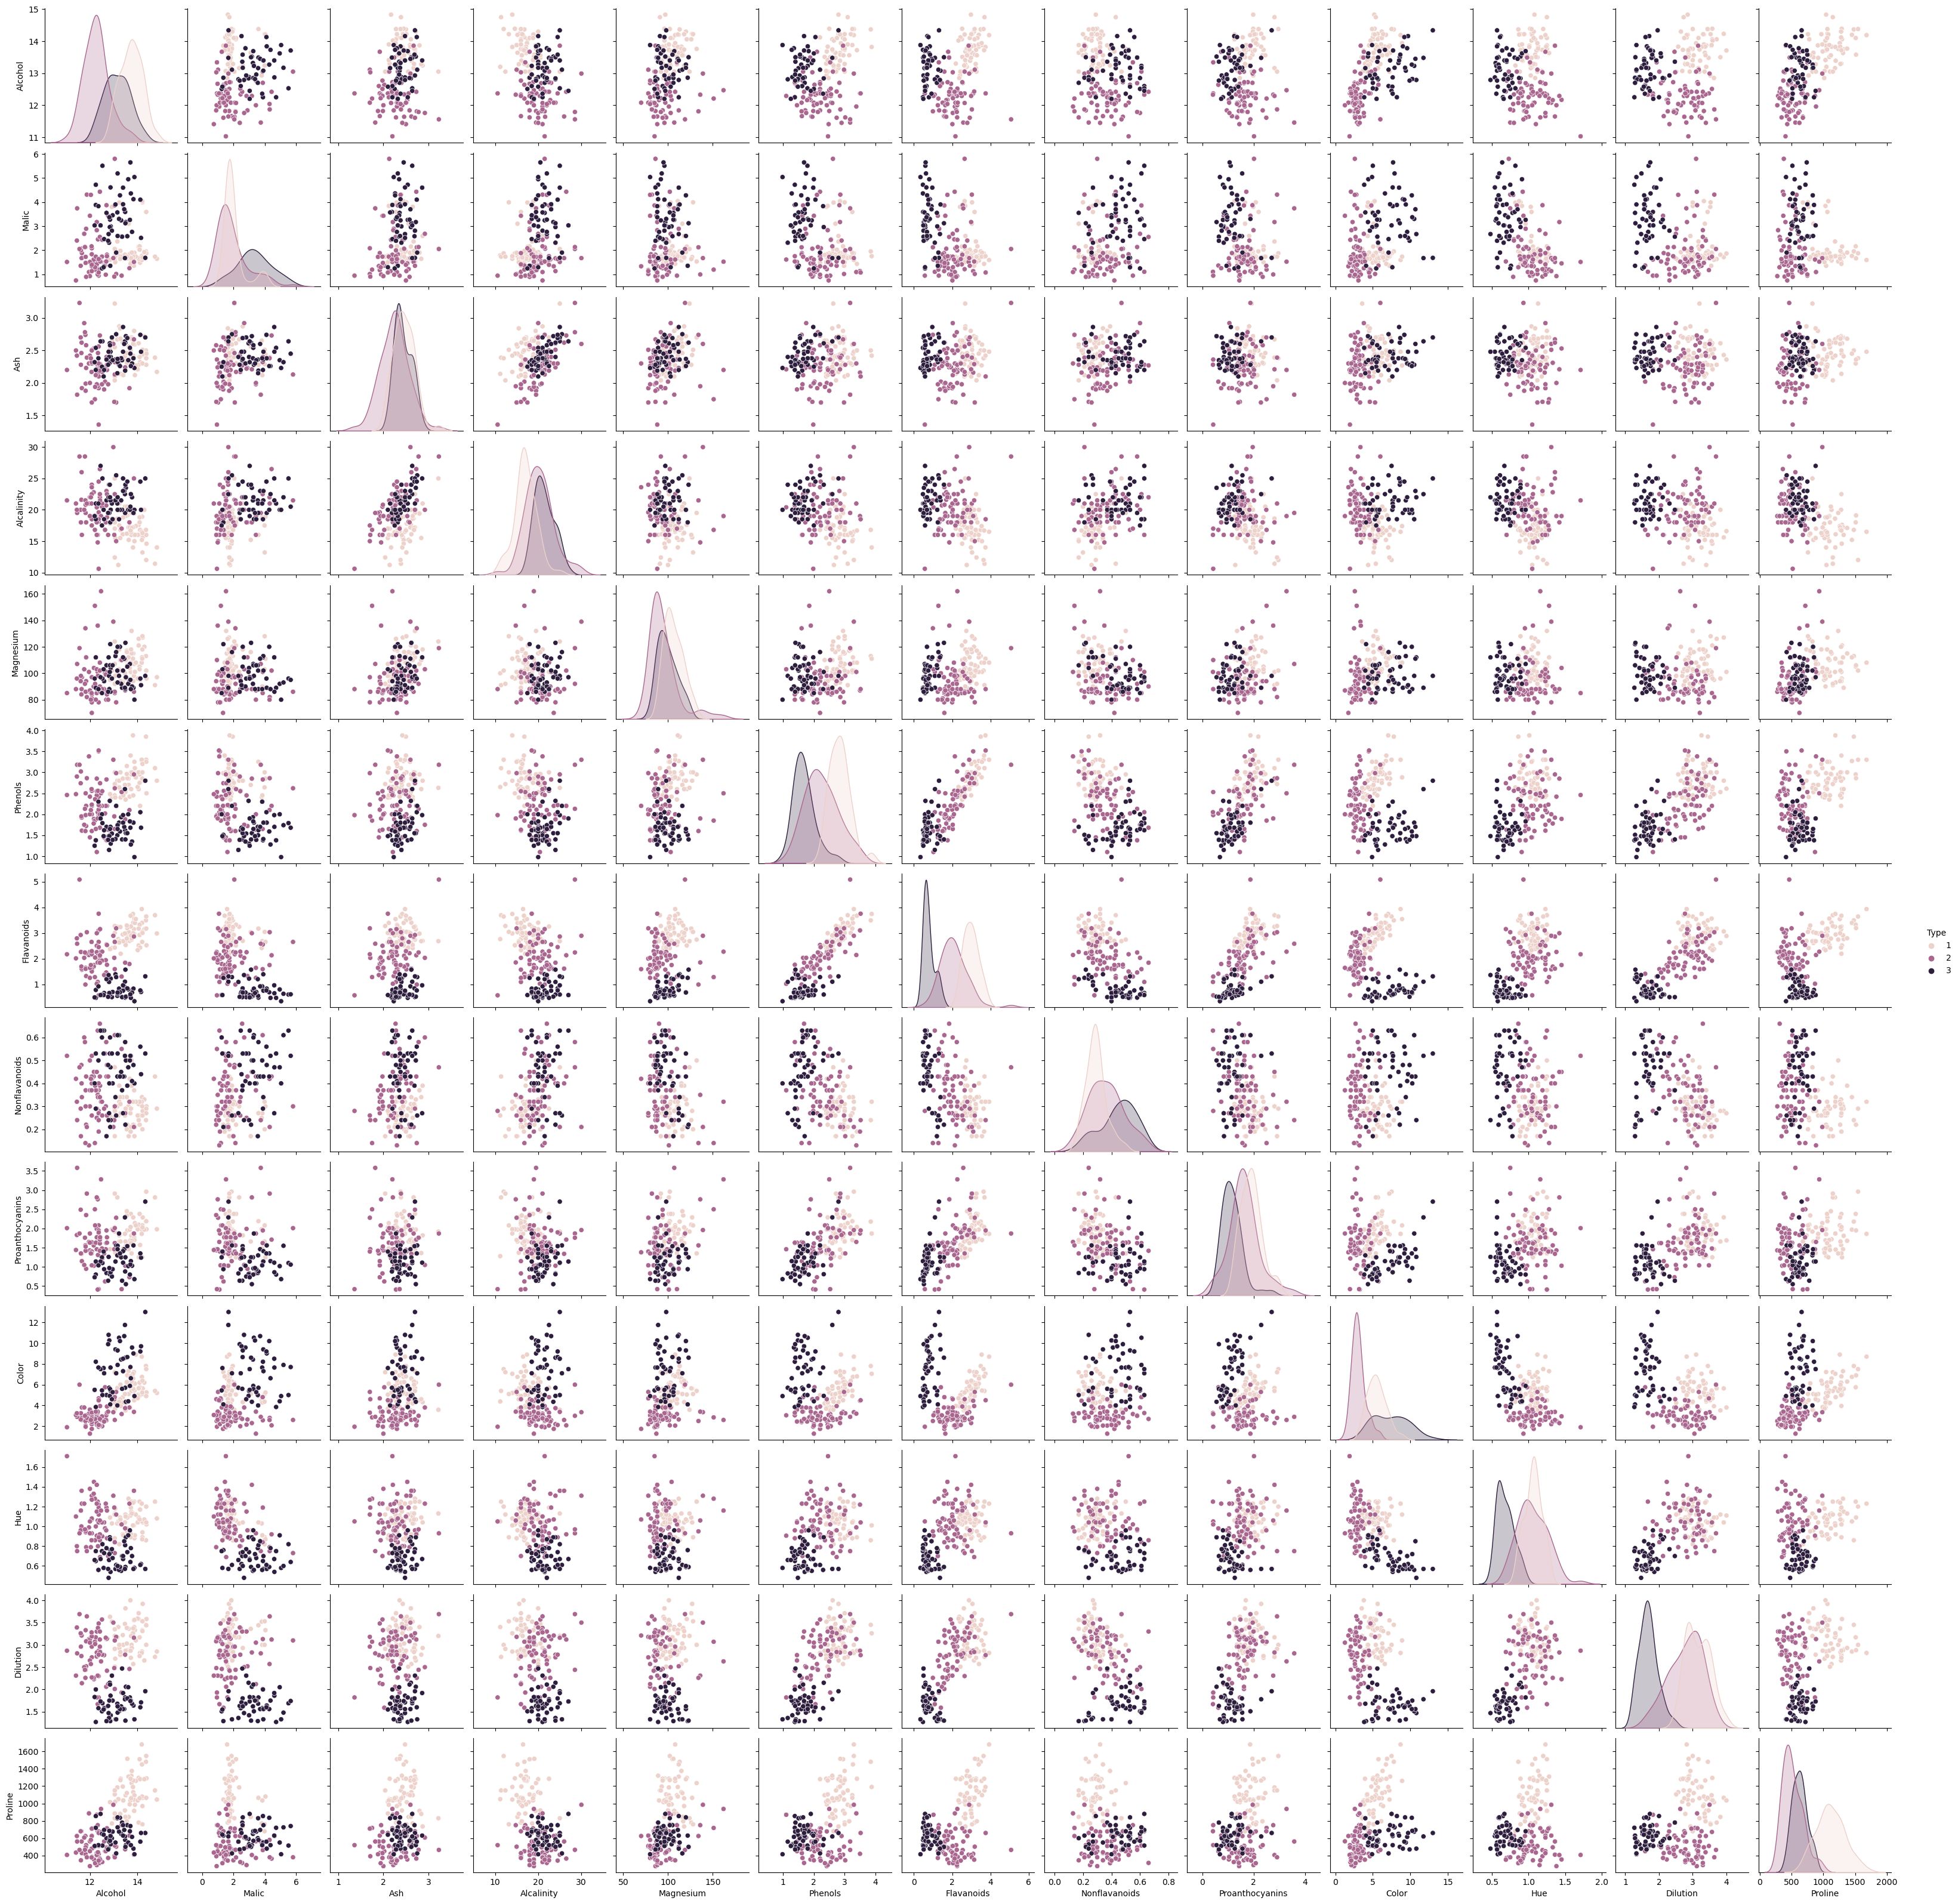

In [9]:
sns.pairplot(df, hue='Type', diag_kind='kde')
plt.show()

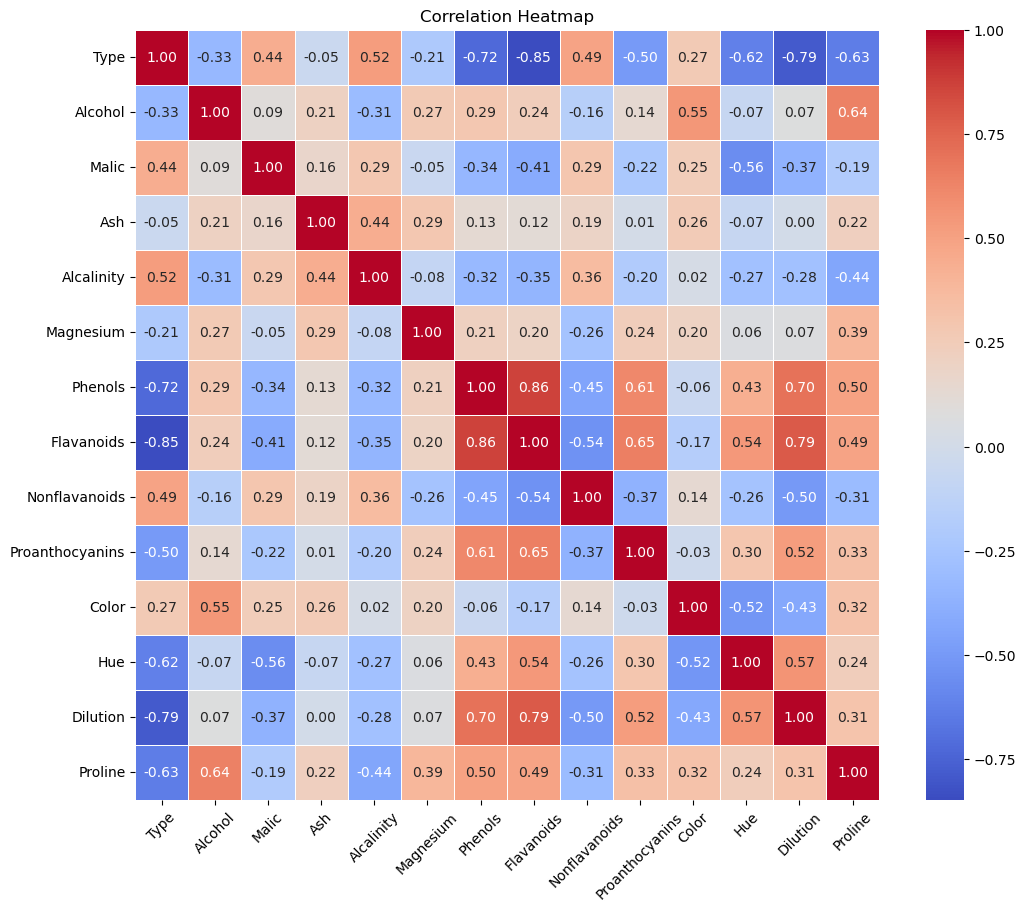

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Creating Correlation Heatmap to visualize the correlation matrix between different features.

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

- Create Boxplots that can show the distribution of each feature and identify potential outliers

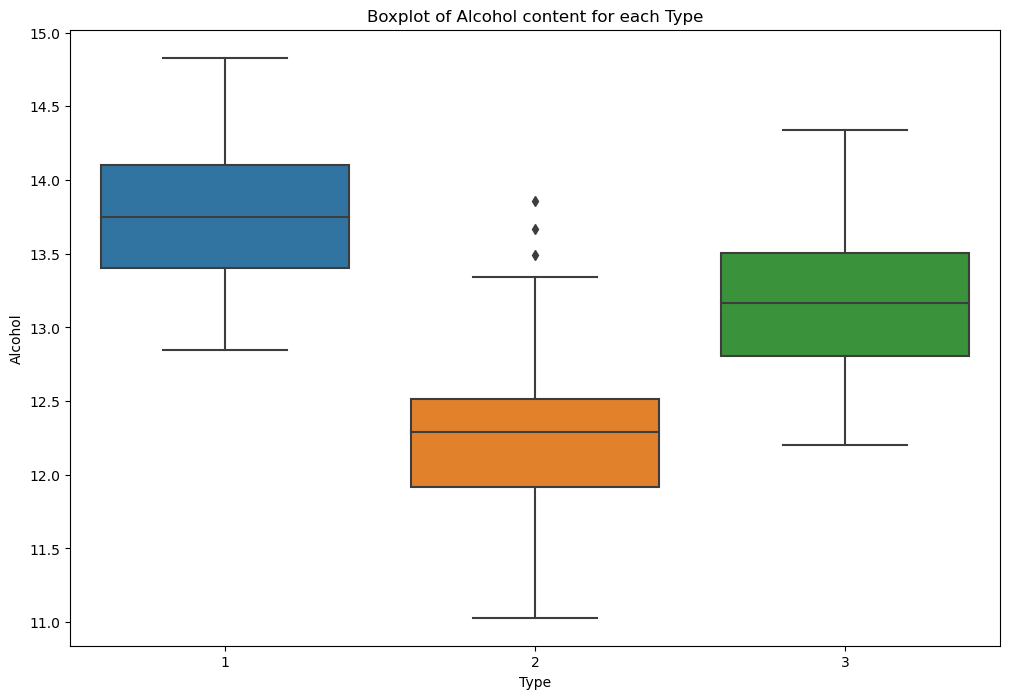

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Alcohol', data=df)
plt.title('Boxplot of Alcohol content for each Type')
plt.show()

In [33]:
# Separate features and target variable

X = df.drop('Type', axis=1)  # Features
y = df['Type']  # Target variable

In [32]:
# Standardize the features to ensure equal variance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Instantiate a PCA object with the desired number of components (3 in this case)

In [27]:
pca = PCA(n_components=3)

In [28]:
# Fit the PCA model to the standardized data

pca_components = pca.fit_transform(X_scaled)

- Instantiate a hierarchical clustering object with linkage method as 'ward' (default)

In [29]:
ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [30]:
# Fit the hierarchical clustering model to the PCA components

ward_cluster.fit(pca_components)

AgglomerativeClustering(n_clusters=3)

- Determine the optimal number of clusters using the silhouette score for hierarchical clustering

In [19]:
silhouette_scores_hierarchical = []
for num_clusters in range(2, 11):
    ward_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    ward_cluster.fit(pca_components)
    silhouette_score_cluster = silhouette_score(pca_components, ward_cluster.labels_)
    silhouette_scores_hierarchical.append(silhouette_score_cluster)
    
optimal_num_clusters_hierarchical = silhouette_scores_hierarchical.index(max(silhouette_scores_hierarchical)) + 2
print("Optimal number of clusters (hierarchical):", optimal_num_clusters_hierarchical)

Optimal number of clusters (hierarchical): 3


In [20]:
# Get the linkage matrix from the hierarchical clustering model

linkage_matrix = sch.linkage(pca_components, method='ward')

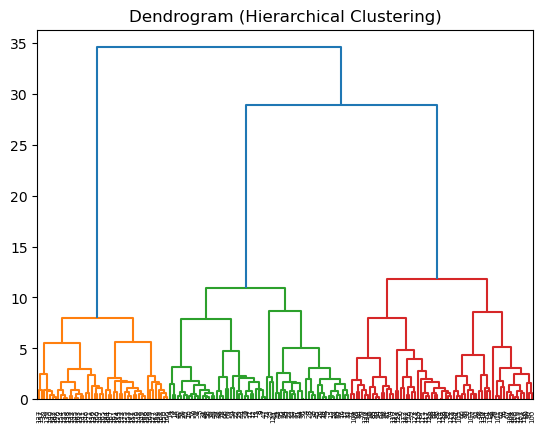

In [21]:
# Create a dendrogram to visualize the hierarchical clustering

dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.show()

- Instantiate a K-means clustering object with the optimal number of clusters (determined using silhouette score)

In [22]:
kmeans = KMeans(n_clusters=optimal_num_clusters_hierarchical)

In [23]:
# Fit the K-means clustering model to the PCA components

kmeans.fit(pca_components)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

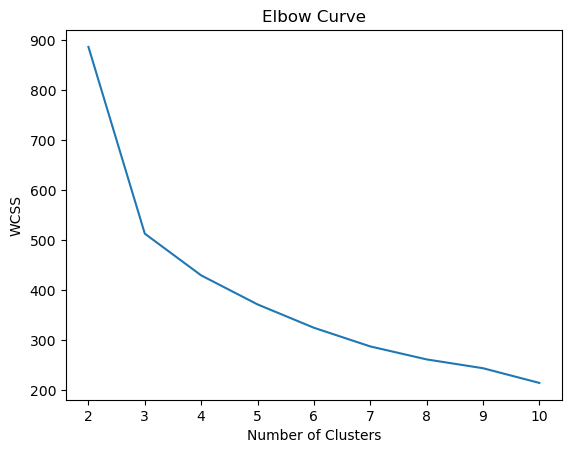

In [24]:
# Plot the elbow curve to visualize the change in within-cluster sum of squares (WCSS) with an increasing number of clusters

wcss = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_components)
    wcss_cluster = kmeans.inertia_
    wcss.append(wcss_cluster)

plt.plot(range(2, 11), wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:
# Determine the optimal number of clusters using the silhouette score for K-means clustering

silhouette_scores_kmeans = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_components)
    silhouette_score_cluster = silhouette_score(pca_components, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_score_cluster)

optimal_num_clusters_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [36]:
# Compare the obtained number of clusters from hierarchical and K-means clustering with the original number of clusters (3)

print("Original number of clusters:", 3)
print("Optimal number of clusters (hierarchical):", optimal_num_clusters_hierarchical)
print("Optimal number of clusters (K-means):", optimal_num_clusters_kmeans)

Original number of clusters: 3
Optimal number of clusters (hierarchical): 3
Optimal number of clusters (K-means): 3


The optimal number of clusters obtained from both hierarchical and K-means clustering using the first 3 principal component scores matches the original number of clusters (3).

This indicates that the PCA-based clustering techniques effectively captured the underlying structure of the data.

# Thanks reader for going through entire book!